In [13]:
from data_transformation import *
import pandas as pd
from model import *
import numpy as np
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, confusion_matrix, roc_curve, roc_auc_score, recall_score
import seaborn as sns
from sklearn import svm
from sklearn.svm import SVC

In [14]:
data = pd.read_csv("Customer-Churn-Records.csv")
data = data.drop(['RowNumber','CustomerId','Surname'],axis=1)

In [15]:
y = data['Exited']
X = data.drop('Exited',axis=1)

In [16]:
input = data_transformation(X)
cols = ['Age','Tenure','NumOfProducts','Satisfaction Score','Balance','EstimatedSalary','Point Earned','CreditScore','France','Germany','Spain','Gender','Card Type','HasCrCard','IsActiveMember','Complain']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(input, y, test_size=0.2)
np.random.seed(4741)
logi = LogisticRegression()
logi.fit(X_train, y_train)
y_pred = logi.predict(X_test)

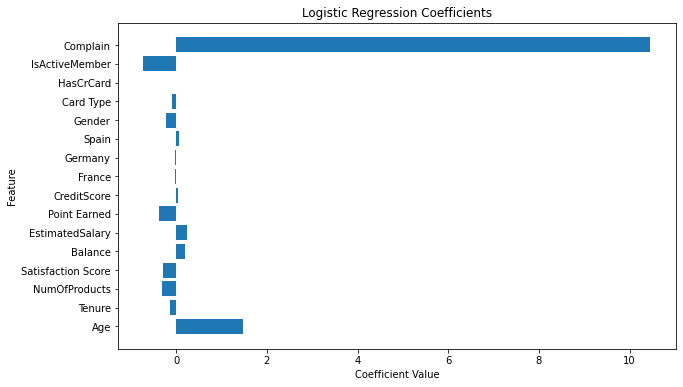

In [18]:
plt.figure(figsize=(10, 6))
plt.barh(range(len(logi.coef_[0])), logi.coef_[0], align='center')
plt.yticks(range(len(cols)), cols)
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Logistic Regression Coefficients')
plt.savefig("dist_logi.png")
plt.show()

In [19]:
# fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# plt.figure(figsize=(8, 8))
# plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc_score(y_test, y_pred))
# plt.plot([0, 1], [0, 1], 'k--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver Operating Characteristic (ROC) Curve')
# plt.legend(loc="lower right")
# plt.show()


f1 score of the logistic model:  0.9973614775725593
recall score of the logistic model:  0.9973614775725593


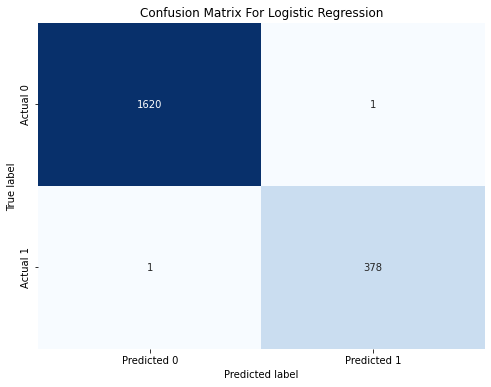

In [20]:
print("f1 score of the logistic model: ",f1_score(y_test,y_pred,average='binary'))
print("recall score of the logistic model: ",recall_score(y_test,y_pred))
cm_logi = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_logi, annot=True, fmt="d", cmap="Blues", cbar=False, 
            xticklabels=['Predicted 0', 'Predicted 1'], 
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix For Logistic Regression')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.savefig('cm_logi.png')
plt.show()

f1 score of the random forest model:  0.9960369881109643
recall score of the random forest model:  0.9947229551451188


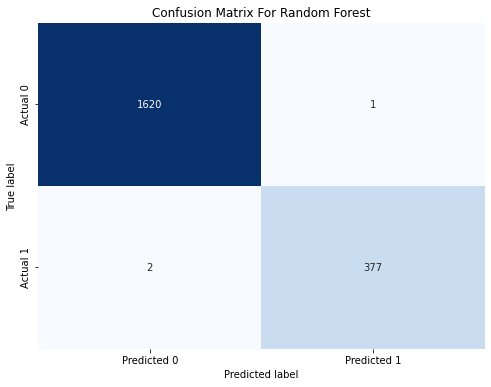

In [21]:
# rf, y_test, y_pred, X_train = RandomForest(input,y)

# X_train, X_test, y_train, y_test = train_test_split(input, y, test_size=0.2)
rf = RandomForestClassifier(max_depth = 4, n_estimators = 10, random_state = 4741)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)


print("f1 score of the random forest model: ",f1_score(y_test,y_pred,average='binary'))
print("recall score of the random forest model: ",recall_score(y_test,y_pred))
cm_rf = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues", cbar=False, 
            xticklabels=['Predicted 0', 'Predicted 1'], 
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix For Random Forest')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.savefig("cm_rf.png")
plt.show()

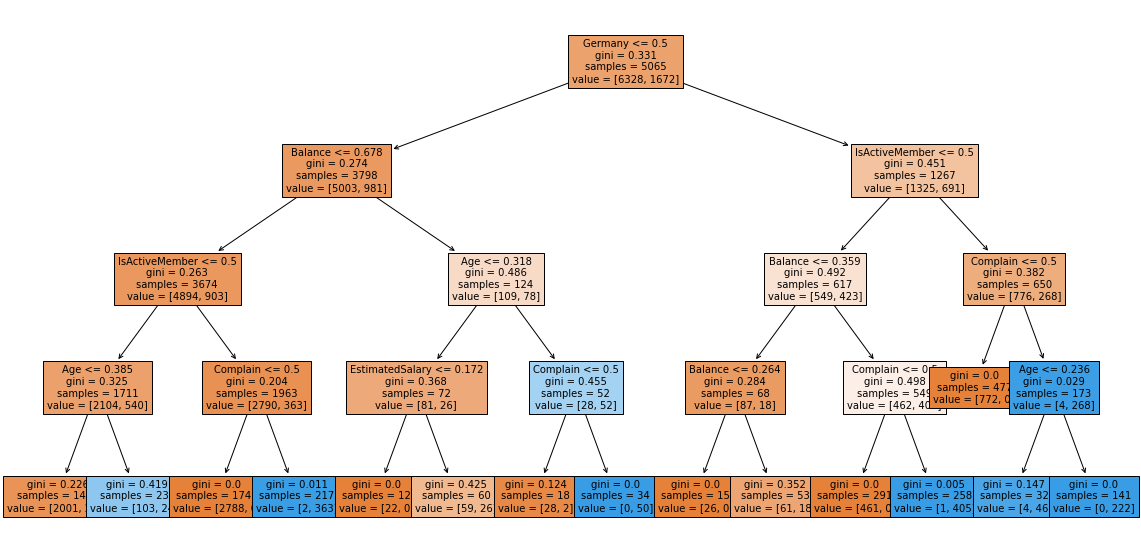

In [22]:
tree_to_visualize = rf.estimators_[0]  # Selecting the first tree, you can choose any other index

plt.figure(figsize=(20,10))
tree.plot_tree(tree_to_visualize, feature_names=cols, filled=True, fontsize=10)
plt.savefig("rf_forest.png")
plt.show()

In [23]:
# X_train, X_test, y_train, y_test = train_test_split(input, y, test_size=0.2, random_state=42)
clf = SVC(kernel='linear', random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

f1 score of the SVM model:  0.9973614775725593
recall score of the SVM model:  0.9973614775725593


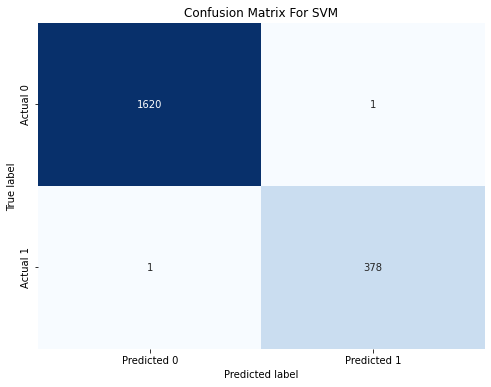

In [24]:
print("f1 score of the SVM model: ",f1_score(y_test,y_pred,average='binary'))
print("recall score of the SVM model: ",recall_score(y_test,y_pred))

cm_clf = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_clf, annot=True, fmt="d", cmap="Blues", cbar=False, 
            xticklabels=['Predicted 0', 'Predicted 1'], 
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix For SVM')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.savefig("cm_svm.png")
plt.show()